# My Mr Clean

In [ ]:
! pip installa

In [198]:
import requests
import mylib as lib
import re
import pandas as pd

## 1. Get content from Wikipedia

In [48]:
def get_content(title):
    url = f"https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles={title}&explaintext&format=json"  
    
    respons = requests.get(url)
    data = respons.json()
    
    return data

In [49]:
data = get_content("Ozone_layer")

In [51]:
data

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}],
  'pages': {'22834': {'pageid': 22834,
    'ns': 0,
    'title': 'Ozone layer',
    'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent o

## 2. merge contents

In [52]:
def merge_contents(json_data):
    key = list(json_data['query']['pages'].keys())[0]
    data = str(json_data['query']['pages'][key]['extract'])

    data = lib.drop_ab({'{':'}', '\(' : '\)'}, data)  

    porridge = data.split("\n\n\n")
    porridge = porridge[0:-4]

    respons = ""
    
    for n in porridge:
        n = lib.drop_symbol(n)
        n = lib.drops(["=", ',', '.', ':', '"', '-', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'], " ", n)
        respons += n
    respons = lib.drops(["\n", "\\"], " ", respons)
    return respons

In [53]:
merge_content = merge_contents(data)

In [54]:
merge_content

"The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation  It contains a high concentration of ozone  that could be used to measure stratospheric ozone from the ground  Between      and       Dobson established a worldwide network of ozone monitoring stations  which continue to operate to this day  The  Dobson unit   a convenient measure of the amount of ozone overhead  is named in his honor  The ozone layer absorbs    to    percent of the Sun's medium frequency ultraviolet light   Concerns that increased UV radiation due to ozone depletion threatened life on Earth  including increased skin cancer in humans and other ecological problems  led to bans on the chemicals  and the latest evidence is that ozone depletion has slowed or stopped  The United Nations General Assembly has designated September    as the International Day for the Preservation of the Ozone Layer  Venus also has a thin ozone layer at an altitude of     ki

## 3. Tokenize

In [55]:
def tokenize(content):
    content = lib.drops([",", "."], " ", content)
    data = content.split(" ")
    data2 = []
    for n in data:
        if len(n) != 0:
            data2.append(n)
    
    return data2

In [56]:
collection = tokenize(merge_content)

In [57]:
collection

['The',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 "Earth's",
 'stratosphere',
 'that',
 'absorbs',
 'most',
 'of',
 'the',
 "Sun's",
 'ultraviolet',
 'radiation',
 'It',
 'contains',
 'a',
 'high',
 'concentration',
 'of',
 'ozone',
 'that',
 'could',
 'be',
 'used',
 'to',
 'measure',
 'stratospheric',
 'ozone',
 'from',
 'the',
 'ground',
 'Between',
 'and',
 'Dobson',
 'established',
 'a',
 'worldwide',
 'network',
 'of',
 'ozone',
 'monitoring',
 'stations',
 'which',
 'continue',
 'to',
 'operate',
 'to',
 'this',
 'day',
 'The',
 'Dobson',
 'unit',
 'a',
 'convenient',
 'measure',
 'of',
 'the',
 'amount',
 'of',
 'ozone',
 'overhead',
 'is',
 'named',
 'in',
 'his',
 'honor',
 'The',
 'ozone',
 'layer',
 'absorbs',
 'to',
 'percent',
 'of',
 'the',
 "Sun's",
 'medium',
 'frequency',
 'ultraviolet',
 'light',
 'Concerns',
 'that',
 'increased',
 'UV',
 'radiation',
 'due',
 'to',
 'ozone',
 'depletion',
 'threatened',
 'life',
 'on',
 'Earth'

## 4. Lower collection

In [59]:
def lower_collection(collection):
    respons = []
    for n in collection:
        respons.append(n.lower())
    return respons    

In [60]:
lower_collection = lower_collection(collection)

In [61]:
lower_collection

['the',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 "earth's",
 'stratosphere',
 'that',
 'absorbs',
 'most',
 'of',
 'the',
 "sun's",
 'ultraviolet',
 'radiation',
 'it',
 'contains',
 'a',
 'high',
 'concentration',
 'of',
 'ozone',
 'that',
 'could',
 'be',
 'used',
 'to',
 'measure',
 'stratospheric',
 'ozone',
 'from',
 'the',
 'ground',
 'between',
 'and',
 'dobson',
 'established',
 'a',
 'worldwide',
 'network',
 'of',
 'ozone',
 'monitoring',
 'stations',
 'which',
 'continue',
 'to',
 'operate',
 'to',
 'this',
 'day',
 'the',
 'dobson',
 'unit',
 'a',
 'convenient',
 'measure',
 'of',
 'the',
 'amount',
 'of',
 'ozone',
 'overhead',
 'is',
 'named',
 'in',
 'his',
 'honor',
 'the',
 'ozone',
 'layer',
 'absorbs',
 'to',
 'percent',
 'of',
 'the',
 "sun's",
 'medium',
 'frequency',
 'ultraviolet',
 'light',
 'concerns',
 'that',
 'increased',
 'uv',
 'radiation',
 'due',
 'to',
 'ozone',
 'depletion',
 'threatened',
 'life',
 'on',
 'earth'

## 5. Count frequensy

In [185]:
def count_frequency(collection):
    respons = {}
    while 0 != len(collection):
        word = collection.pop(0)
        respons[word] = 1
        for n in collection:
            if n == word:
                collection.remove(n)
                respons[word] += 1
    return respons

In [186]:
frequencies = count_frequency(lower_collection[0:-1])

In [187]:
frequencies

{'the': 118,
 'ozone': 53,
 'layer': 13,
 'or': 3,
 'shield': 1,
 'is': 29,
 'a': 20,
 'region': 1,
 'of': 50,
 "earth's": 6,
 'stratosphere': 6,
 'that': 10,
 'absorbs': 3,
 'most': 6,
 "sun's": 2,
 'ultraviolet': 10,
 'radiation': 9,
 'it': 8,
 'contains': 1,
 'high': 5,
 'concentration': 3,
 'could': 1,
 'be': 7,
 'used': 3,
 'to': 29,
 'measure': 2,
 'stratospheric': 3,
 'from': 5,
 'ground': 1,
 'between': 5,
 'and': 42,
 'dobson': 2,
 'established': 1,
 'worldwide': 3,
 'network': 1,
 'monitoring': 1,
 'stations': 1,
 'which': 5,
 'continue': 1,
 'operate': 1,
 'this': 7,
 'day': 2,
 'unit': 1,
 'convenient': 1,
 'amount': 2,
 'overhead': 1,
 'named': 1,
 'in': 2,
 'his': 1,
 'honor': 1,
 'percent': 4,
 'medium': 1,
 'frequency': 1,
 'light': 5,
 'concerns': 1,
 'increased': 3,
 'uv': 9,
 'due': 3,
 'depletion': 6,
 'threatened': 1,
 'life': 2,
 'on': 6,
 'earth': 3,
 'including': 2,
 'skin': 4,
 'cancer': 3,
 'humans': 1,
 'other': 3,
 'ecological': 1,
 'problems': 1,
 'led': 1,

## 6. Visualizing

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.style.use('dark_background')

In [227]:
def print_most_frequent(frequencies, n):
    keys, values = [], []
    for key, value in frequencies.items():
        keys.append(key)
        values.append(value)
    data = pd.DataFrame({"words" : keys, "frequent" : values})
    df = data.sort_values(by=["frequent"], ascending=False).head(n)
    
    f, ax = plt.subplots(figsize=(20, 15))
    ax.grid(False)
    sns.set_color_codes("muted")
    sns.set(style="darkgrid")
    sns.barplot(x="frequent", y="words", data=df, label="Ozare Layer",  orient = "h").set(title='Most Common Tokens  In The Ozar Layers article')
    
    
    

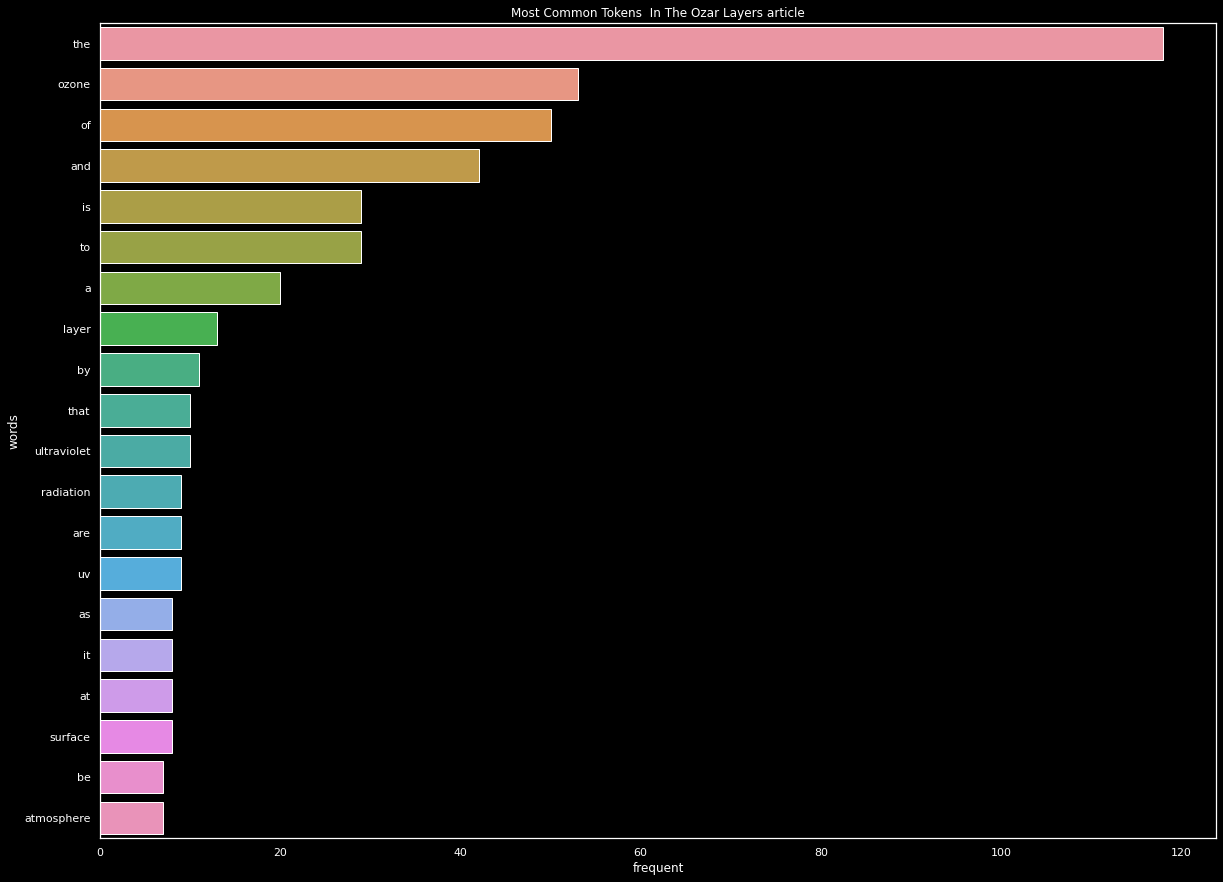

In [228]:
print_most_frequent(frequencies, 20)

## 7.Filtering

In [89]:
# def remove_stop_words(words, stop_words):
#   for key, value in words.items():
#         copy_words[key] = value

# #   for key, value in copy_words.items():
# #     for i in stop_words:
# #       if i == key:
# #         copy_words.pop(key)
#   return copy_words

In [192]:
frequencies

{'the': 118,
 'ozone': 53,
 'layer': 13,
 'or': 3,
 'shield': 1,
 'is': 29,
 'a': 20,
 'region': 1,
 'of': 50,
 "earth's": 6,
 'stratosphere': 6,
 'that': 10,
 'absorbs': 3,
 'most': 6,
 "sun's": 2,
 'ultraviolet': 10,
 'radiation': 9,
 'it': 8,
 'contains': 1,
 'high': 5,
 'concentration': 3,
 'could': 1,
 'be': 7,
 'used': 3,
 'to': 29,
 'measure': 2,
 'stratospheric': 3,
 'from': 5,
 'ground': 1,
 'between': 5,
 'and': 42,
 'dobson': 2,
 'established': 1,
 'worldwide': 3,
 'network': 1,
 'monitoring': 1,
 'stations': 1,
 'which': 5,
 'continue': 1,
 'operate': 1,
 'this': 7,
 'day': 2,
 'unit': 1,
 'convenient': 1,
 'amount': 2,
 'overhead': 1,
 'named': 1,
 'in': 2,
 'his': 1,
 'honor': 1,
 'percent': 4,
 'medium': 1,
 'frequency': 1,
 'light': 5,
 'concerns': 1,
 'increased': 3,
 'uv': 9,
 'due': 3,
 'depletion': 6,
 'threatened': 1,
 'life': 2,
 'on': 6,
 'earth': 3,
 'including': 2,
 'skin': 4,
 'cancer': 3,
 'humans': 1,
 'other': 3,
 'ecological': 1,
 'problems': 1,
 'led': 1,

In [194]:
def remove_stop_words(words, stop_words):
    copy_words = {}
    for key, value in words.items():
        copy_words[key] = value

    keys = []
    for key, value in copy_words.items():
        for word in stop_words:
            if key == word:
                keys.append(key)

    for key in keys:
        copy_words.pop(key)
    return copy_words

In [195]:
stop_words = ["the", 'a', "blah", "123"]

filtered_collection = remove_stop_words(frequencies, stop_words)

In [193]:
filtered_collection

{'ozone': 53,
 'layer': 13,
 'or': 3,
 'shield': 1,
 'is': 29,
 'region': 1,
 'of': 50,
 "earth's": 6,
 'stratosphere': 6,
 'that': 10,
 'absorbs': 3,
 'most': 6,
 "sun's": 2,
 'ultraviolet': 10,
 'radiation': 9,
 'it': 8,
 'contains': 1,
 'high': 5,
 'concentration': 3,
 'could': 1,
 'be': 7,
 'used': 3,
 'to': 29,
 'measure': 2,
 'stratospheric': 3,
 'from': 5,
 'ground': 1,
 'between': 5,
 'and': 42,
 'dobson': 2,
 'established': 1,
 'worldwide': 3,
 'network': 1,
 'monitoring': 1,
 'stations': 1,
 'which': 5,
 'continue': 1,
 'operate': 1,
 'this': 7,
 'day': 2,
 'unit': 1,
 'convenient': 1,
 'amount': 2,
 'overhead': 1,
 'named': 1,
 'in': 2,
 'his': 1,
 'honor': 1,
 'percent': 4,
 'medium': 1,
 'frequency': 1,
 'light': 5,
 'concerns': 1,
 'increased': 3,
 'uv': 9,
 'due': 3,
 'depletion': 6,
 'threatened': 1,
 'life': 2,
 'on': 6,
 'earth': 3,
 'including': 2,
 'skin': 4,
 'cancer': 3,
 'humans': 1,
 'other': 3,
 'ecological': 1,
 'problems': 1,
 'led': 1,
 'bans': 2,
 'chemical

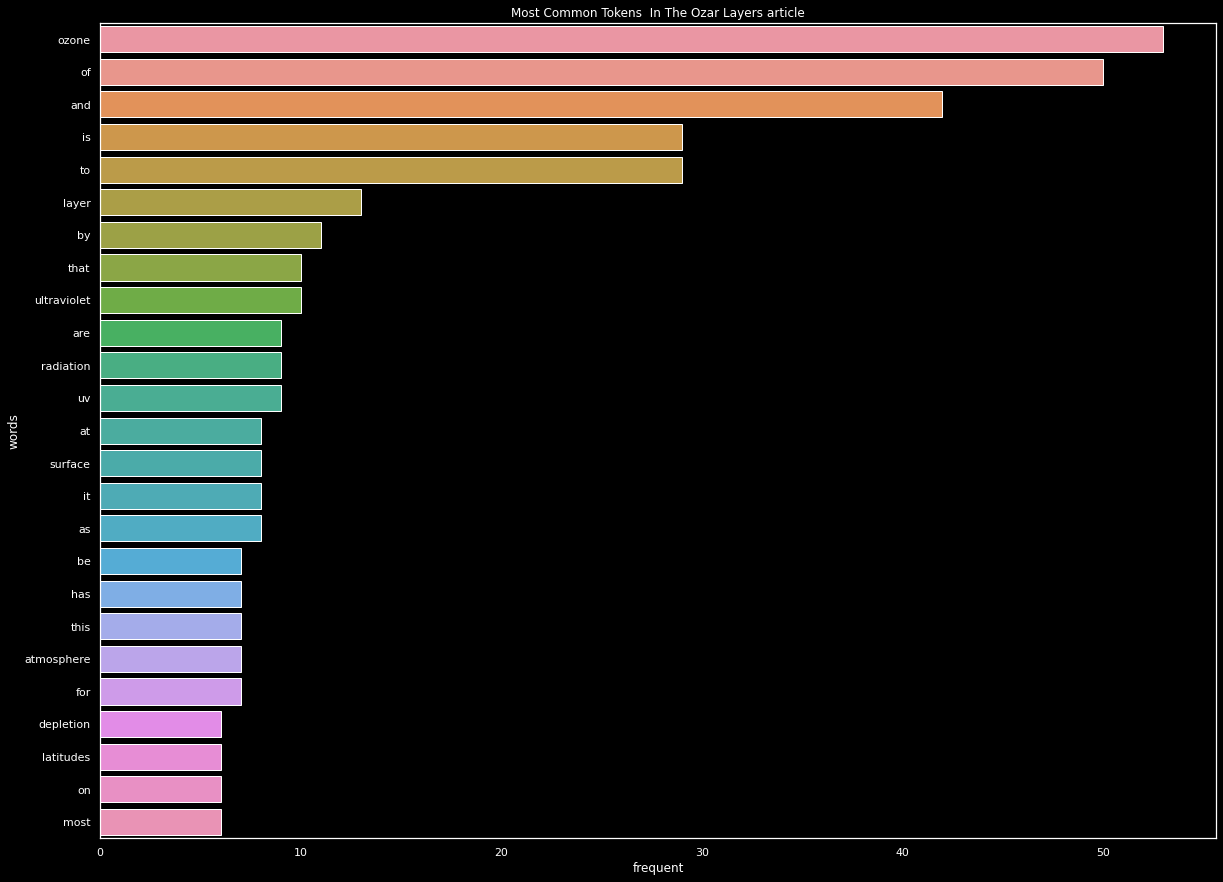

In [197]:
print_most_frequent(filtered_collection, 25)

## Testing

In [3]:
! pip install seaborn

     |████████████████████████████████| 292 kB 2.9 MB/s            


In [19]:
! gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User temirov_s connection: OK


<MY_MR_CLEAN>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MR CLEAN 

 Status             SUCCESS     
 Execution Runtime  1.750980    
 Score              [=====] 5/5 


Checks detail Report:

 TEST COUNT FREQUENCY  SUCCESS 



 TEST GET CONTENT  SUCCESS 



 TEST LOWER COLLECTION  SUCCESS 



 TEST MERGE CONTENTS  SUCCESS 



 TEST TOKENIZE  SUCCESS 


</MY_MR_CLEAN>
